<a href="https://colab.research.google.com/github/joaquinmenendez/Facial_Recognition_Pipeline/blob/master/notebooks/FaceDectector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Recognition Pipeline

In [0]:
!pip install facenet-pytorch
!pip install tqdm
!pip install git+git://github.com/PnS2019/pnslib.git

     |████████████████████████████████| 1.9MB 3.4MB/s 
  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-0aetjc9x
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-0aetjc9x
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp36-none-any.whl size=1489618 sha256=222b7285a361c7b49ce30f36250d5da85035c0bd562fc357a6e5c84210fefa34
  Stored in directory: /tmp/pip-ephem-wheel-cache-3ekvt27j/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib


In [0]:
!pip install -q -U imutils git+https://github.com/the-house-of-black-and-white/hall-of-faces.git

In [0]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=b52a4b59f2c7b9f0b37c3030012a7076a7d6b103a263b0de29bac352f5b06199
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
# Libraries
from facenet_pytorch import MTCNN, InceptionResnetV1
import cv2
from pnslib import utils
from PIL import Image
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
#from imutils import  url_to_image, opencv2matplotlib
#from hof.face_detectors import RfcnResnet101FaceDetector, SSDMobileNetV1FaceDetector,FasterRCNNFaceDetector, YOLOv2FaceDetector, TinyYOLOFaceDetector
import face_recognition


In [0]:
MIN_CONFIDENCE=0.5

def display(img, figsize=(15,15)):
  plt.figure(figsize=figsize)
  plt.axis('off')
  plt.imshow(opencv2matplotlib(img))
  plt.show()


One face

In [0]:
img = cv2.imread("AzuDuke.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [0]:
mtcnn = MTCNN(select_largest=False, post_process = False, margin = 50)
img_cropped = mtcnn(img)

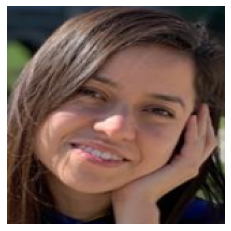

In [0]:
plt.imshow(img_cropped.permute(1, 2, 0).int().numpy())
plt.axis('off');

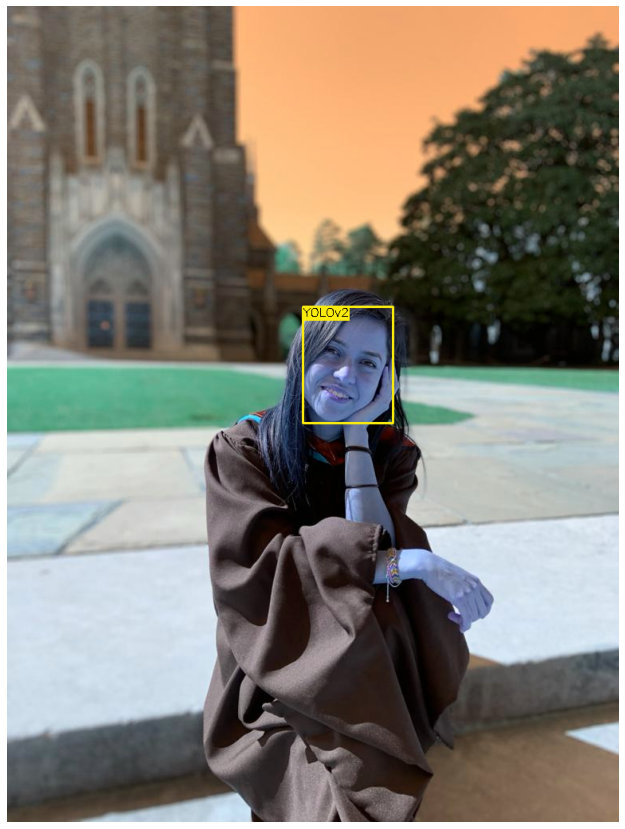

In [0]:
yolo_face_detector = YOLOv2FaceDetector(min_confidence=MIN_CONFIDENCE)
yolo_face_detector.detect(img, color=(15, 235, 250))
display(img)

In [0]:
image = face_recognition.load_image_file("AzuDuke.jpeg")
image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display video frame
        title("Input Stream")
        plt.imshow(frame)  
face_locations = face_recognition.face_locations(image)

In [0]:
img = cv2.imread('AzuDuke.jpeg')


In [0]:
im1 = img.crop(face_locations[0]) 
# Shows the image in image viewer 
im1.show() 

AttributeError: ignored

Mutiple dectection

In [0]:
img = cv2.imread("azucena.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [0]:
mtcnn = MTCNN(select_largest=False, post_process = False, margin = 50, keep_all = True)
img_cropped = mtcnn(img)

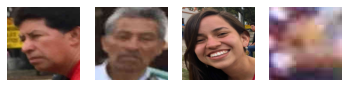

In [0]:
faces = mtcnn(img)
fig, axes = plt.subplots(1, len(faces))
for face, ax in zip(faces, axes):
    ax.imshow(face.permute(1, 2, 0).int().numpy())
    ax.axis('off')
fig.show()


Video

In [0]:
v_cap = cv2.VideoCapture('IMG-3935.MOV')
v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
mtcnn = MTCNN(margin=50,post_process=False, select_largest = False)

In [0]:
frames = []
for i in tqdm(range(v_len)):
    
    # Load frame
    success = v_cap.grab()
    if i % 10 == 0:
        success, frame = v_cap.retrieve()
    else:
        continue
    if not success:
        continue
        
    # Add to batch
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(Image.fromarray(frame))

In [0]:
def imgCrop(image, cropBox, boxScale=1):
    # Crop a PIL image with the provided box [x(left), y(upper), w(width), h(height)]
    # Calculate scale factors
    xDelta=max(cropBox[2]*(boxScale-1),0)
    yDelta=max(cropBox[3]*(boxScale-1),0)
    PIL_box=[cropBox[0]-xDelta, cropBox[1]-yDelta, cropBox[0]+cropBox[2]+xDelta, cropBox[1]+cropBox[3]+yDelta]

    return image.crop(PIL_box)

In [0]:
face_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_frontalface_default.xml'))

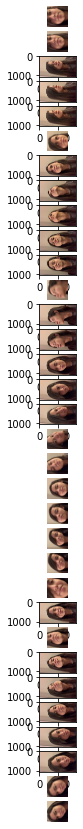

In [0]:
# Detect faces in batch
faces = mtcnn(frames)

# find faces in image
fig, axes = plt.subplots(len(faces), 1, figsize=(24, 15))
for i, face in enumerate(faces):
  if face is not None:
    axes[i].imshow(face.permute(1, 2, 0).int().numpy())
    axes[i].axis('off')
  else:
    gray_img = cv2.cvtColor(np.array(frames[i]), cv2.COLOR_BGR2GRAY)
    face_img = face_cascade.detectMultiScale(gray_img)
    if type(face_img) == tuple:
      axes[i].imshow(frames[i])
    else:
      croppedImage=imgCrop(gray_img, face_img)
      axes[i].imshow(croppedImage)
fig.show()

Image Embeddings

In [0]:
resnet = InceptionResnetV1(pretrained='vggface2').eval()
img_embedding = resnet(img_cropped.unsqueeze(0))

In [0]:
img_embedding.shape

torch.Size([1, 512])

In [0]:
img = frames[0]

Check out this website: https://colab.research.google.com/drive/1lJWquGmKoMm68qNuwjSnfMjjIi-UTzI1#scrollTo=xI6xgkF3FOVQ